# Decision Trees

In [21]:
import numpy as np
import pandas as pd

In [22]:
data = pd.read_csv('machine-learning-online-2018-master/13. Decision Trees/titanic.csv')

In [23]:
data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
columns_to_drop = ["PassengerId","Name","Ticket","Cabin","Embarked"]

In [26]:
data_clean = data.drop(columns_to_drop,axis=1)

In [27]:
data_clean.head(n=5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_clean["Sex"] = le.fit_transform(data_clean["Sex"])

In [29]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [30]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [14]:
data_clean = data_clean.fillna?

In [19]:
data_clean = data_clean.fillna

AttributeError: 'function' object has no attribute 'fillna'

In [31]:
data_clean = data_clean.fillna(data_clean["Age"].mean())

In [31]:
data_clean.loc[1]

Survived     1.0000
Pclass       1.0000
Sex          0.0000
Age         38.0000
SibSp        1.0000
Parch        0.0000
Fare        71.2833
Name: 1, dtype: float64

In [32]:
input_cols = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
output_cols = ["Survived"]

X = data_clean[input_cols]
Y = data_clean[output_cols]

print(X.shape,Y.shape)

(891, 6) (891, 1)


In [33]:
# Define Entropy and Decision Gain

In [34]:
def entropy(col):
    
    counts = np.unique(col,return_counts=True)
    N = float(col.shape[0])
    ent = 0.0
    
    for ix in counts[1]:
        p = ix/N
        ent += -1.0*p*np.log2(p)
        
    return ent   

In [35]:
def divide_data(x_data,fkey,fval):
    
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        
        if val>fval:
            x_right = x_right.append(x_data.loc[ix])
        else:
            x_left = x_left.append(x_data.loc[ix])
            
    return x_left,x_right

In [36]:
x_left,x_right = divide_data(data_clean[:10],'Sex',0.5)
print(x_left)
print(x_right)

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
1       1.0     1.0  0.0  38.0    1.0    0.0  71.2833
2       1.0     3.0  0.0  26.0    0.0    0.0   7.9250
3       1.0     1.0  0.0  35.0    1.0    0.0  53.1000
8       1.0     3.0  0.0  27.0    0.0    2.0  11.1333
9       1.0     2.0  0.0  14.0    1.0    0.0  30.0708
   Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0       0.0     3.0  1.0  22.000000    1.0    0.0   7.2500
4       0.0     3.0  1.0  35.000000    0.0    0.0   8.0500
5       0.0     3.0  1.0  29.699118    0.0    0.0   8.4583
6       0.0     1.0  1.0  54.000000    0.0    0.0  51.8625
7       0.0     3.0  1.0   2.000000    3.0    1.0  21.0750


In [37]:
def information_gain(x_data,fkey,fval):
    
    left,right = divide_data(x_data,fkey,fval)
    
    l=float(left.shape[0]/x_data.shape[0])
    r=float(right.shape[0]/x_data.shape[0])
    
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -100000
    
    i_gain = entropy(x_data.Survived)-(l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain

In [38]:
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.001158644038169343
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [39]:
class DecisionTree:
    
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train(self,X_train):
        
        features = ['Pclass','Sex','Age','SibSp','Parch','Fare']
        info_gains = []
        
        for ix in features:
            i_gain = information_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        print("Making Tree Features is",self.fkey)
        
        data_left,data_right = divide_data(X_train,self.fkey,self.fval)
        
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        
        if(self.depth>=self.max_depth):
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survive"
        else:
            self.target = "Dead"
        return
    
    def predict(self,test):
        if test[self.fkey]>self.fval:
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)            

In [54]:
d = DecisionTree()
d.train(data_clean)

Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Pclass
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Feat

In [40]:
split = int(0.7*data_clean.shape[0])

train_data = data_clean[:split]
test_data = data_clean[split:]

test_data = test_data.reset_index(drop=True)

In [41]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [42]:
dt = DecisionTree()

In [59]:
dt.train(train_data)

Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Parch
Making Tree Features is Pclass
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tre

In [60]:
y_pred = []

for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [61]:
print(y_pred)

['Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Survive', 'Dead', 'Survive', 'Survive', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Survive', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Survive', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Survive', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Survive', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Survive', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Survive', 'Survive', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 

In [62]:
y_actual = test_data[output_cols]

In [63]:
print(y_actual)

     Survived
0           0
1           0
2           0
3           0
4           1
..        ...
263         0
264         1
265         0
266         1
267         0

[268 rows x 1 columns]


In [64]:
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)

In [65]:
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [67]:
print(y_pred.shape)
print(y_actual.shape)

(268,)
(268, 1)


In [69]:
y_pred = np.array(y_pred).reshape((-1,1))
print(y_pred.shape)

(268, 1)


In [70]:
acc = np.sum(np.array(y_pred)==np.array(y_actual))/y_pred.shape[0]
print(acc)

0.8171641791044776


# Decision Tree using Sklearn

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [85]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [86]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0])

In [87]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.8283582089552238

# Visualising a Decision Tree

In [101]:
import pydotplus

In [102]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [103]:
dot_data = StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

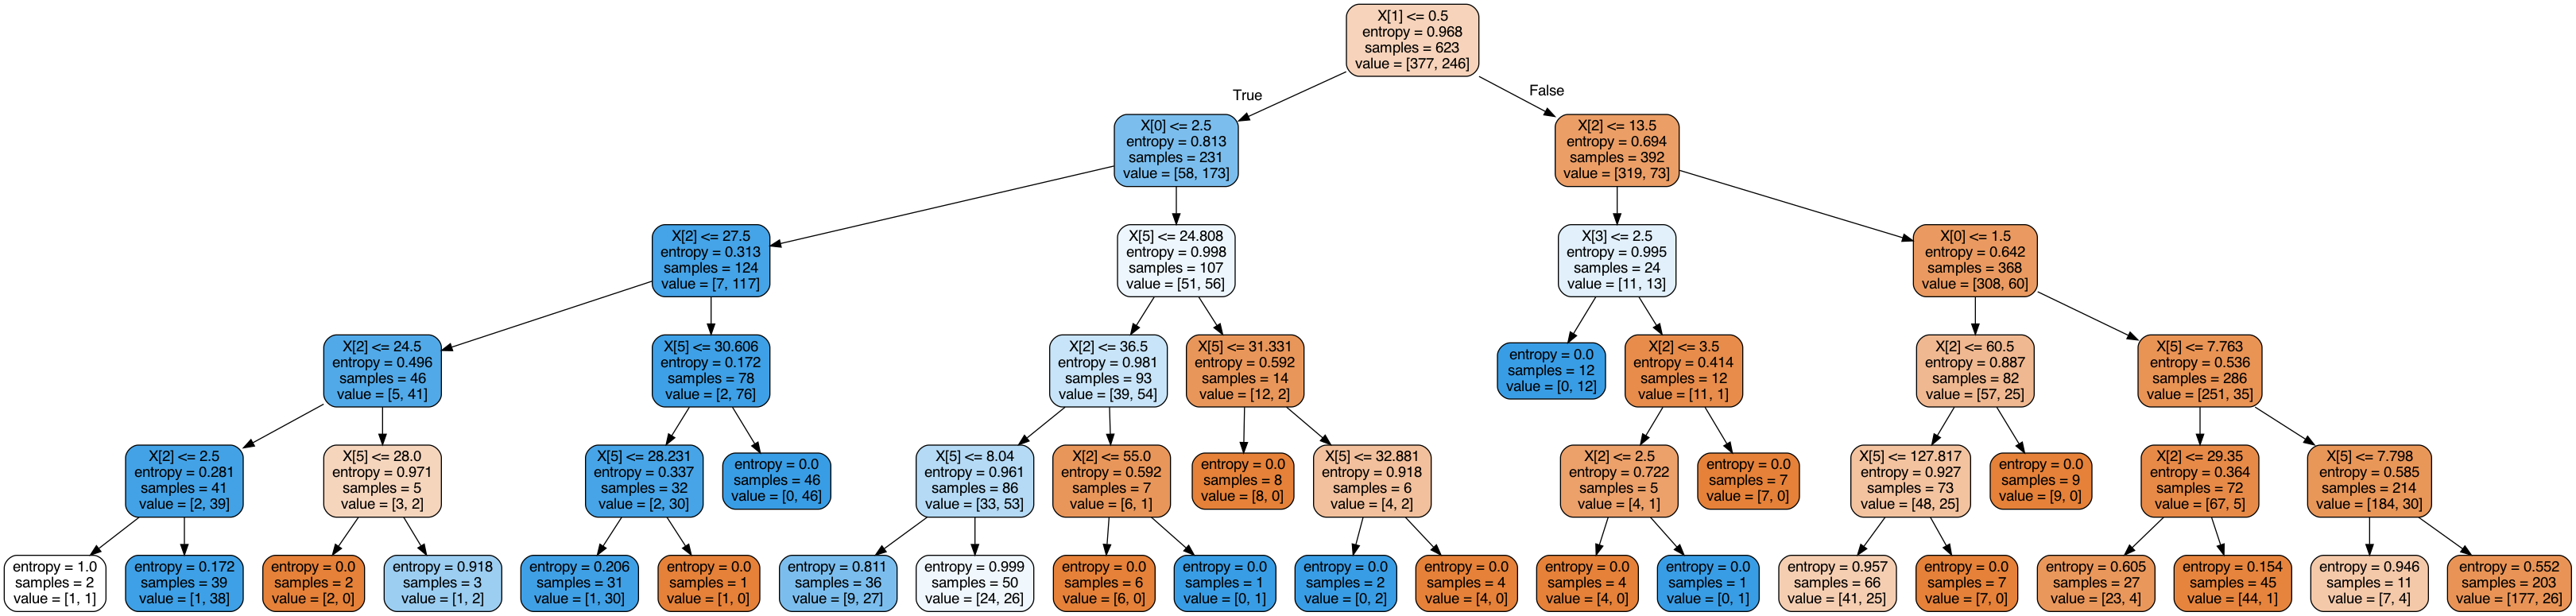

In [105]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest

In [44]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))

X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))

In [50]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [51]:
sk_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
sk_tree.score(X_train, Y_train)

0.8443017656500803

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier(n_estimators=32, criterion='entropy', max_depth=5)

In [75]:
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
rf.score(X_train, Y_train)

0.8539325842696629

In [77]:
rf.score(X_test, Y_test)

0.832089552238806

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
acc = cross_val_score(rf, X_train, Y_train, cv = 5).mean()

In [67]:
print(acc)

0.8202064516129031


In [68]:
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=5), X_train, Y_train, cv = 5).mean()
    acc_list.append(acc)

In [72]:
print(acc_list)
print(np.argmax(acc_list))

[0.7559870967741935, 0.7832516129032259, 0.8025548387096773, 0.8040645161290323, 0.8153419354838709, 0.8025548387096773, 0.8041548387096775, 0.8169677419354839, 0.8138193548387097, 0.7961677419354838, 0.8025161290322581, 0.8154064516129033, 0.8233548387096775, 0.8154193548387096, 0.8265548387096775, 0.8089161290322581, 0.8154064516129033, 0.8201935483870969, 0.8137419354838709, 0.8281677419354839, 0.7945161290322581, 0.8201548387096773, 0.8201548387096775, 0.8122064516129033, 0.8169677419354837, 0.8201935483870967, 0.8089290322580645, 0.8170193548387097, 0.816941935483871, 0.8105806451612902, 0.8298064516129031, 0.8233677419354839, 0.8362193548387097, 0.8266580645161291, 0.8201290322580645, 0.8153677419354839, 0.8105548387096773, 0.8089290322580645, 0.8201548387096773, 0.8169548387096773, 0.8201806451612903, 0.8153677419354839, 0.8234064516129033, 0.8153419354838709, 0.8137419354838709, 0.8186193548387097, 0.8121419354838709, 0.8153419354838709, 0.8089419354838709]
32


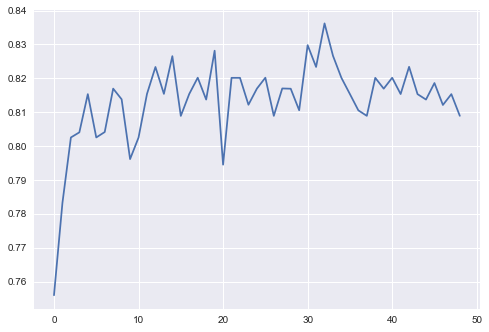

In [71]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(acc_list)